### - Lead Scoring Case Study

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

#### - Step 1: Importing and preparing the data

In [2]:
#Importing the 'Leads.csv' file

Leads = pd.read_csv('Leads.csv')

In [3]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Removing all columns which are created after the lead call

Leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Quality','Lead Profile'], 1, inplace = True)

In [5]:
#Creating a copy to retain the original data for future use if needed

Leads_copy = Leads.copy()

In [6]:
#Checking the shape of the data

Leads.shape

(9240, 30)

In [7]:
Leads_dub = Leads.copy()

In [8]:
#Checking the data types
#We can see below that some columns have null values present

Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Checking the statistics of the numerical columns

Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### - Step 2: Cleaning the data

In [10]:
#As can be seen the consumer has not selected any option from the list, which is why we can see the 'select' value present in hence we treat these values as Null values
#Converting 'Select' values to NaN

Leads = Leads.replace('Select', np.nan)
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [11]:
#Checking the number of null values present by column

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#Checking the percentage of null values present in each column

round((Leads.isnull().sum()/len(Leads)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
#As seen above Null values are present in some columns
#Before we start cleaning up the data, we'll be dropping 'Lead Number' and 'Prospect ID' as they contain only unique values

Leads.drop(['Lead Number','Prospect ID'], 1, inplace = True)

In [14]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [15]:
#We will begin handling Null values one column at a time
#First we'll drop columns with values higher than 60%

Leads = Leads.drop(Leads.loc[:,list(round((Leads.isnull().sum()/len(Leads)*100),2)>60)].columns, 1)

In [16]:
#Checking to see if the specified columns have been dropped

round((Leads.isnull().sum()/len(Leads)*100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
#We'll begin with the 'City' column

Leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### - 'Mumbai' seems to be the most common value

In [18]:
#We can go ahead and impute 'Mumbai' for the missing values

Leads['City'] = Leads['City'].replace(np.nan, 'Mumbai')

In [19]:
#As we can see below the missing values have been replaced by 'Mumbai'

Leads['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
#Next we'll take the 'Specialization' column

Leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

##### - We can say that the consumers may have left the field empty as they did not find their specialization present in the list. So we can create a new category by replacing the missing values with the word 'Other'.

In [21]:
#We'll be taking the same approach as before and replace missing values with 'India'

Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'Other')

In [22]:
#As we can see below the missing values have been replaced by 'India'

Leads['Specialization'].value_counts()

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
#The next column with most missing values present is 'What matters most to you in choosing a course'

Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### - 'Better career prospects' seems to be the most common reason

In [24]:
#We'll be replacing the missing values with 'Better Career Prospects' as it's the most common value

Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [25]:
#As we can see below the missing values have been replaced by 'Better Career Prospect'

Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
#The column we'll look at next is, 'What is your current occupation'

Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### - As we can see above is that the most common value is 'Unemployed'

In [27]:
#We'll be replacing the missing values with 'Unemployed'

Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
#As we can see below the missing values have been replaced by 'Unemployed'

Leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#The next column we'll look at is, 'Country'

Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Philippines                2
Belgium                    2
Netherlands                2
China                      2
Bangladesh                 2
Liberia                    1
Sri Lanka                  1
Tanzania                   1
Indonesia                  1
Malaysia                   1
Vietnam                    1
Kenya         

##### - As can be seen above, 'India' is the most common value

In [30]:
#We'll be replacing the missing values with 'India'

Leads['Country'] = Leads['Country'].replace(np.nan, 'India')

In [31]:
#As we can see below the missing values have been replaced by 'India'

Leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Philippines                2
Belgium                    2
Netherlands                2
China                      2
Bangladesh                 2
Liberia                    1
Sri Lanka                  1
Tanzania                   1
Indonesia                  1
Malaysia                   1
Vietnam                    1
Kenya         

In [32]:
#Checking to see the null values after the changes are made

round((Leads.isnull().sum()/len(Leads)*100),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [33]:
#We can drop the remaining rows, as the percentage of missing values is extremely low

Leads.dropna(inplace = True)

In [34]:
#Checking to see the null values after remaining missigng values have been dropped

round((Leads.isnull().sum()/len(Leads)*100),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [35]:
#Checking the percentage of data available for EDA

Leads_data = len(Leads)*100/len(Leads_copy)
print('The percentage of original rows available for EDA is {}'.format(round(Leads_data,2)))

The percentage of original rows available for EDA is 98.2


##### - Now that the data has been cleaned up, we can begin EDA

#### - Step 3: Exploratory Data Analysis

In [36]:
#We can begin by looking at the target variable, 'Converted'
#Successful conversion is indicated by 1 or else if not, a 0
#We can also check the current rate of conversion

CR = round((sum(Leads['Converted'])/len(Leads['Converted'].index))*100,2)
print('Current conversion rate is {}%'.format(CR))

Current conversion rate is 37.86%


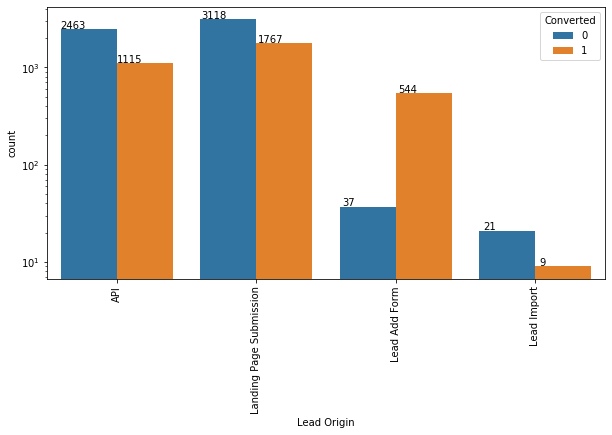

In [37]:
#Lets also check the sources through which leads are generated

plt.figure(figsize = (10,5))

ax = sns.countplot(x = 'Lead Origin', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

##### - 31 to 36% conversion rate for API and Landing page submission
##### - 93% conversion rate for Lead add form
##### - 30% conversion for Lead import. Also count is very less.
##### - Therefore if we are to imporve the overall conversion rate or CR. We need to focus on improving the conversions generated from API and Land page submissions. We also need to focus on generating more leads from lead add form.

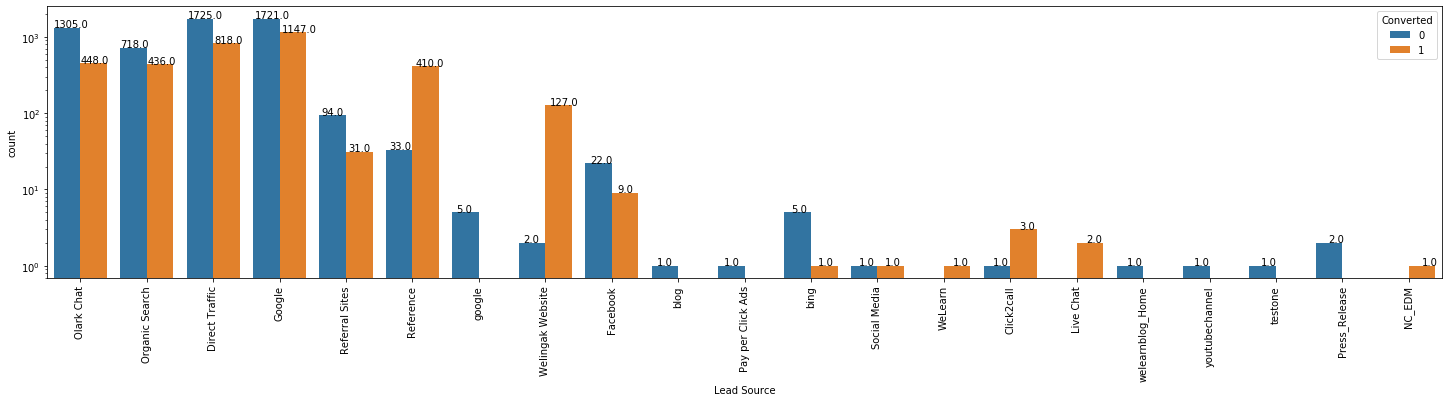

In [38]:
#Next we can take a look at the 'Lead Source'

plt.figure(figsize = (25,5))

ax = sns.countplot(x = 'Lead Source', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

##### - As we can see above some small modifications are needed to be made. Google and google need to be aligned. Also the sources not generating enough leads can be grouped into a single category.

In [39]:
#Making the changes to the Lead Source column

Leads['Lead Source'] = Leads['Lead Source'].replace(['google'], 'Google')
Leads['Lead Source'] = Leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

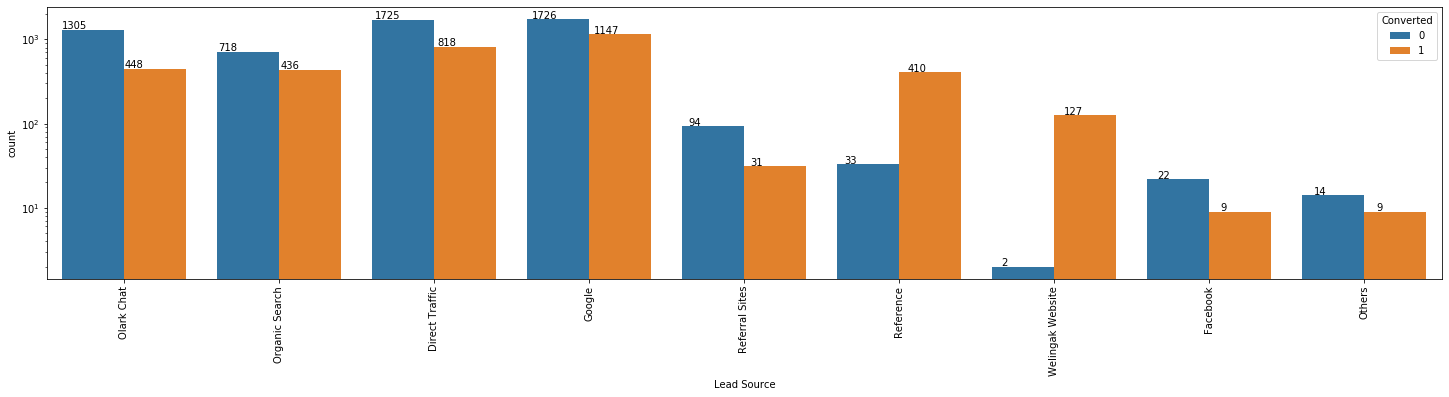

In [40]:
#We can take a look at the 'Lead Source', after the changes have been made

plt.figure(figsize = (25,5))

ax = sns.countplot(x = 'Lead Source', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

##### - Direct traffic and Google generate the maximum amount of leads
##### - Reference and Wellingak have a high conversion
##### - Our focus should be on improving the conversion rate of olark, organic, direct and Google leads.

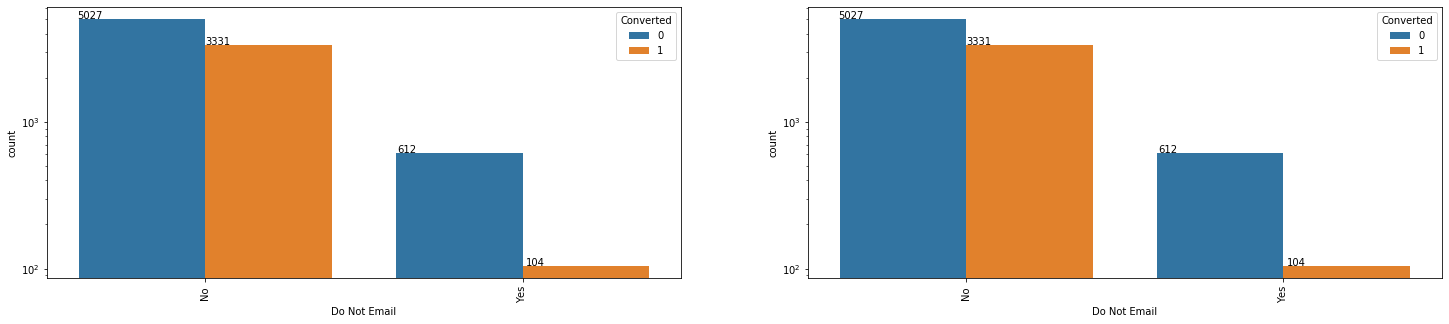

In [41]:
#Looking at 'Do not email and Do not call'

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)

ax = sns.countplot(x = 'Do Not Email', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')

plt.subplot(1,2,2)

ax = sns.countplot(x = 'Do Not Email', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')

plt.show()

In [42]:
#Looking at 'Total Visits'

Leads['TotalVisits'].describe(percentiles = [0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

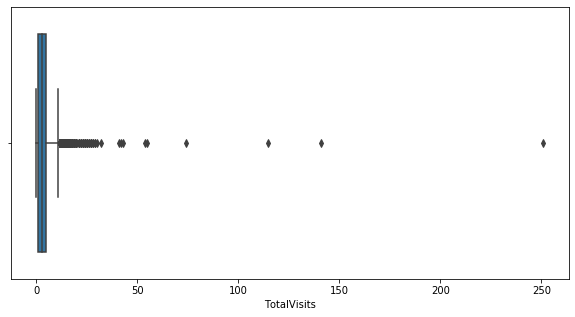

In [43]:
#Visualising the data
#As seen below we've got a lot outliers which needed to be treated

plt.figure(figsize = (10,5))
sns.boxplot(Leads['TotalVisits'])
plt.show()

In [44]:
#Capping outliers at 95% for analysis

percentiles = Leads['TotalVisits'].quantile([0.05,0.95]).values
Leads['TotalVisits'][Leads['TotalVisits']<=percentiles[0]] = percentiles[0]
Leads['TotalVisits'][Leads['TotalVisits']>=percentiles[1]] = percentiles[1]

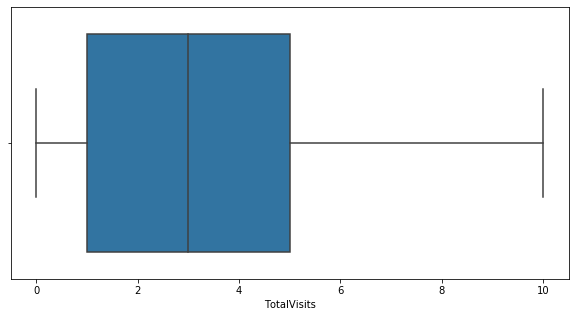

In [45]:
#Visualing data after capping the outliers

plt.figure(figsize = (10,5))
sns.boxplot(Leads['TotalVisits'])
plt.show()

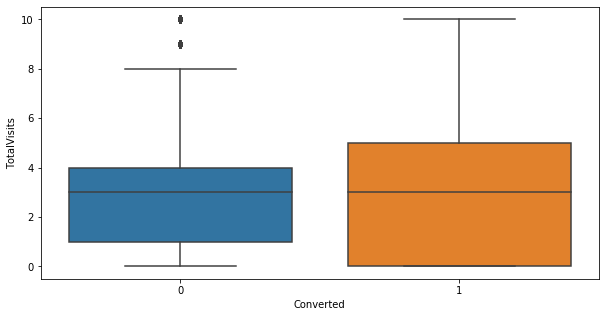

In [46]:
#TotalVisits vs Conversion

plt.figure(figsize = (10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads)
plt.show()

##### - Medians seem to be the same for both, converted and not converted. Hence, nothing can be concluded

In [47]:
#Looking at 'Total time spent on website'

Leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

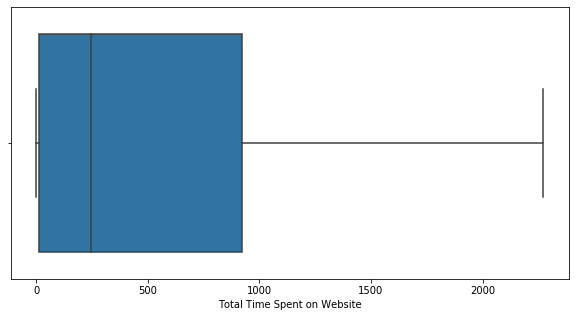

In [48]:
#Visualing data 

plt.figure(figsize = (10,5))
sns.boxplot(Leads['Total Time Spent on Website'])
plt.show()

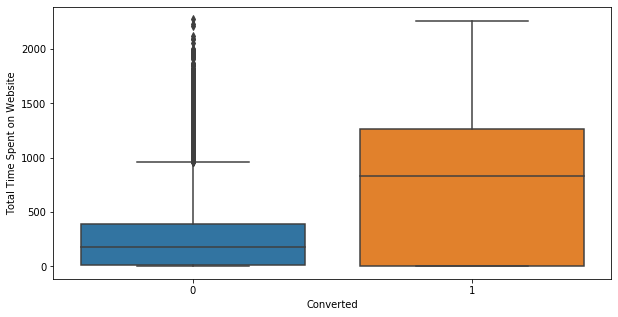

In [49]:
#Total Time Spent on Website vs Conversion

plt.figure(figsize = (10,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads)
plt.show()

##### - The leads that end up spending more time on the website have a higher chance of conversion
##### - Focus should be on improving user experience on the website, thereby lowering rhe bounce rate

In [50]:
#Looking at 'Page views per visit'

Leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

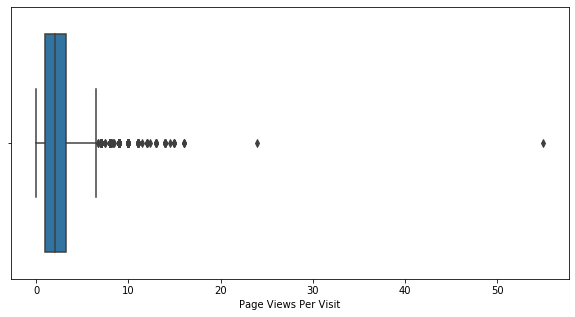

In [51]:
#Visualing data 
#As seen below the data has outliers

plt.figure(figsize = (10,5))
sns.boxplot(Leads['Page Views Per Visit'])
plt.show()

In [52]:
#Capping outliers at 95%

percentiles = Leads['Page Views Per Visit'].quantile([0.05,0.95]).values
Leads['Page Views Per Visit'][Leads['Page Views Per Visit']<=percentiles[0]] = percentiles[0]
Leads['Page Views Per Visit'][Leads['Page Views Per Visit']>=percentiles[1]] = percentiles[1]

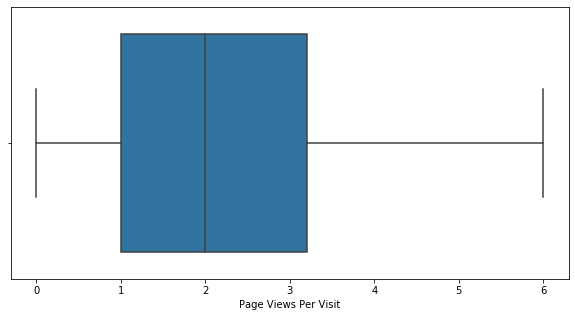

In [53]:
plt.figure(figsize = (10,5))
sns.boxplot(Leads['Page Views Per Visit'])
plt.show()

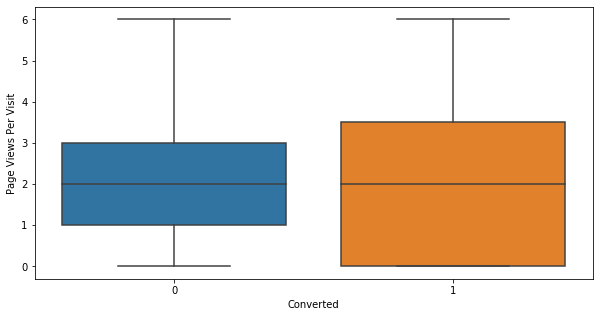

In [54]:
#Page Views Per Visit vs Conversion

plt.figure(figsize = (10,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Leads)
plt.show()

##### - Median for both seems to be the same, hence nothing specific can be said for this

In [55]:
#Looking at 'Last Activity'

Leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

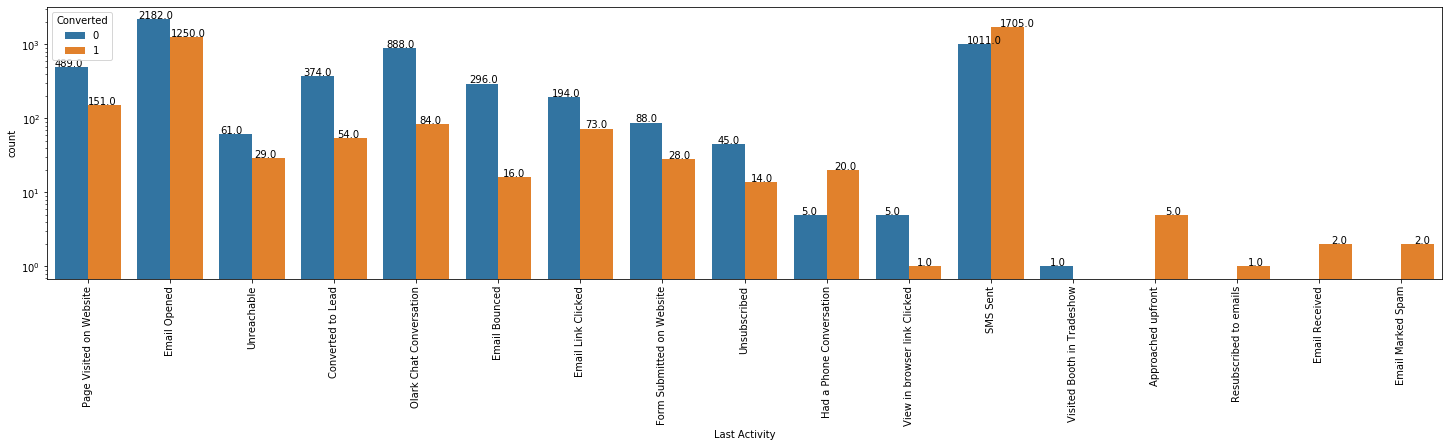

In [56]:
#Visualising the data

plt.figure(figsize = (25,5))

ax = sns.countplot(x = 'Last Activity', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [57]:
#Making the changes to the Last Activity column
#Clubbing togther the activities which have little impact into a new category, 'Other Activity'

Leads['Last Activity'] = Leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

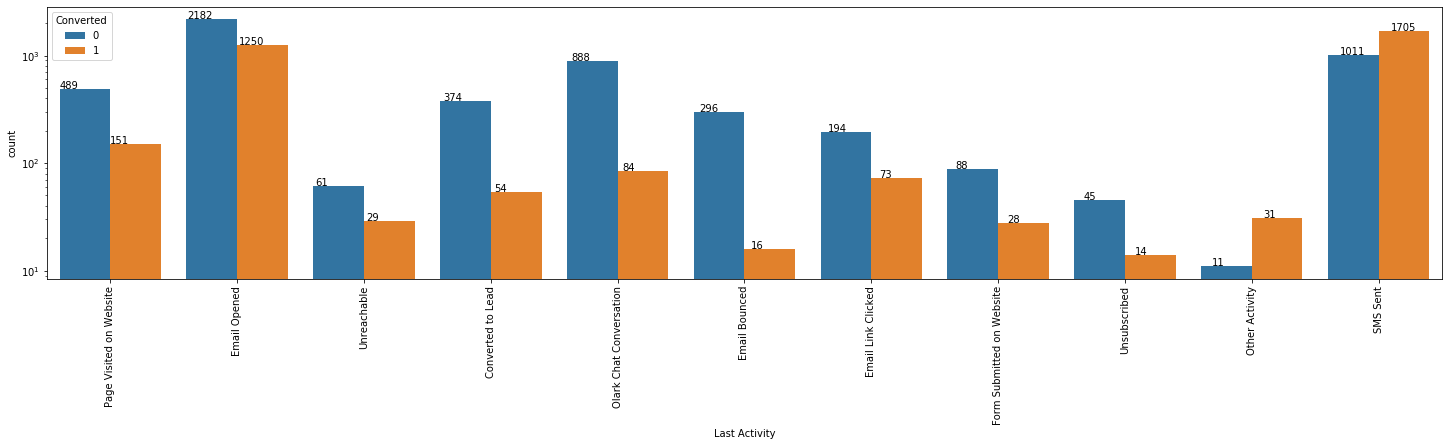

In [58]:
#Visualising the data after making the changes

plt.figure(figsize = (25,5))

ax = sns.countplot(x = 'Last Activity', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

##### - Email Opened is the most common last activity of the Leads
##### - High conversion rate for SMS Sent as a last activity

In [59]:
#Looking at 'Country'

Leads['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Philippines                2
Belgium                    2
Netherlands                2
China                      2
Bangladesh                 2
Liberia                    1
Sri Lanka                  1
Tanzania                   1
Indonesia                  1
Malaysia                   1
Vietnam                    1
Kenya         

##### - Maximum values are stated as 'India'. We can say that majority of business is based in India.
##### - United States, Middle East, Singapore and Europe can be come other high potential markets

In [60]:
#Looking at 'Specialization'

Leads['Specialization'].value_counts()

Other                                3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### - Looking at the above values we can say that the more emphasis should be given to the specilizations that have high conversion rates

In [61]:
#Taking a look at 'Occupation'

Leads['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

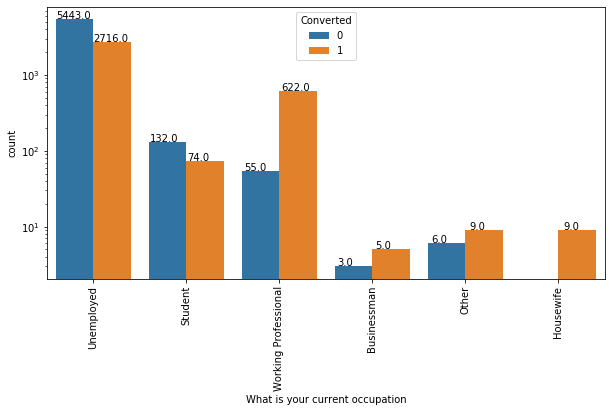

In [62]:
#Visualising the data 

plt.figure(figsize = (10,5))

ax = sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

##### - As can be seen above working professionals have an edge
##### - Largest number of leads are unemployed but rate of conversion very low

In [63]:
#Looking at 'What matters most to you in choosing a course'

Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

##### - As seen above no inference can be drawn

In [64]:
#Looking at 'Search'

Leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

##### - As seen above no inference can be drawn

In [65]:
#Looking at 'Magazine'

Leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

##### - As seen above no inference can be drawn

In [66]:
#Looking at 'Newspaper Article'

Leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

##### - As seen above no inference can be drawn

In [67]:
#Looking at 'X Education Forums'

Leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

##### - As seen above no inference can be drawn

In [68]:
#Looking at 'Newspaper'

Leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

##### - As seen above no inference can be drawn

In [69]:
#Looking at 'Digital Advertisement'

Leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

##### - As seen above no inference can be drawn

In [70]:
#Looking at 'Through Recommendations'

Leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

##### - As seen above no inference can be drawn

In [71]:
#Looking at 'Receive More Updates About Our Courses'

Leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

##### - As seen above no inference can be drawn

In [72]:
#Looking at 'Update me on Supply Chain Content'

Leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

##### - As seen above no inference can be drawn

In [73]:
#Looking at 'Get updates on DM Content'

Leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

##### - As seen above no inference can be drawn

In [74]:
#Looking at 'I agree to pay the amount through cheque'

Leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

##### - As seen above no inference can be drawn

In [75]:
#Looking at 'A free copy of Mastering The Interview'

Leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

##### - As seen above this variable has no influence on the remaining variables at all

In [76]:
#Looking at 'City'

Leads['City'].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

##### - Majority of the leads are originating from the city of Mumbai

In [77]:
#Looking at 'Last Notable Activity'

Leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

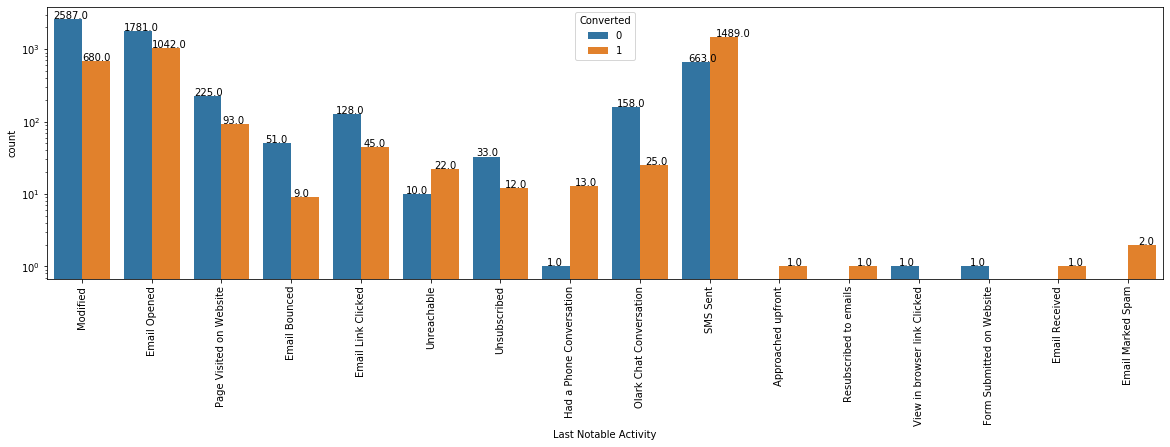

In [78]:
#Visualising the data 

plt.figure(figsize = (20,5))

ax = sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = Leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

##### - The most promising variable for a positive lead is 'SMS Sent'

##### - After doing univariate analysis of all the variables, it can be said that most of the columns are not adding much useful information to the model. Therefore, we'll be droppign them from the analysis

In [79]:
#Dropping the columns we won't be needing for further analysis

Leads = Leads.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

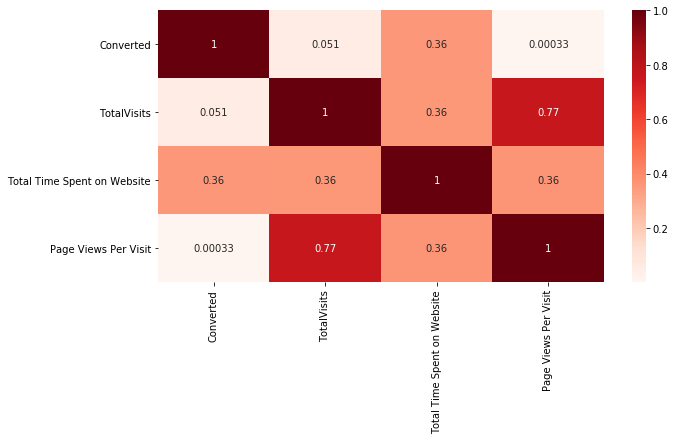

In [80]:
#Checking correlation amongst the variables

plt.figure(figsize = (10,5))
sns.heatmap(Leads.corr(), annot = True, cmap = 'Reds')
plt.show()

##### - Highest correlation is amongst Total Visits and Page Views per Visit at 0.77

In [81]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,Modified


In [82]:
#Comparing Last Activity vs Last Notable Activity

print(Leads['Last Activity'].value_counts())
print(Leads['Last Notable Activity'].value_counts())

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other Activity                 42
Name: Last Activity, dtype: int64
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1


##### - As we can see from above there are many similarities between the two columns, hence we can drop one of them

In [83]:
#Dropping the 'Last Notable Activity'

Leads.drop(['Last Notable Activity'],1,inplace = True)

In [84]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai


In [85]:
#Converting binary variable to 1/0

var_list = ['Do Not Email', 'Do Not Call']

def bin_map(x):
    return x.map({'Yes': 1, 'No': 0})

Leads[var_list] = Leads[var_list].apply(bin_map)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai


In [86]:
#Treating the categorical variables by creating a dummy variable

dummy = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City']], drop_first = True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [87]:
#Combining the dummy results with the main dataframe

Leads = pd.concat([Leads, dummy], axis = 1)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [88]:
#Dropping the selected columns

Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City'], axis = 1)
Leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
#Assigning the target variable X

X = Leads.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
#Response variables to Y

y = Leads['Converted']

In [91]:
#Splitting into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 333)

In [92]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,4.0,346,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,10.0,165,5.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,4.0,639,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,6.0,385,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,2.0,450,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [93]:
X_train.shape

(7259, 54)

In [94]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,0,0,5.0,71,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7926,0,0,4.0,233,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1909,0,0,5.0,431,2.50,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8971,0,0,4.0,1776,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5310,0,0,4.0,101,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [95]:
X_test.shape

(1815, 54)

In [96]:
y_train.head()

9190    0
8604    0
2916    0
189     1
3037    0
Name: Converted, dtype: int64

In [97]:
y_train.shape

(7259,)

In [98]:
y_test.head()

1461    0
7926    0
1909    0
8971    1
5310    0
Name: Converted, dtype: int64

In [99]:
y_test.shape

(1815,)

#### - Step 4: Feature Scaling

In [100]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.300780,-0.255196,0.976193,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.467531,-0.587537,1.534715,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.300780,0.282792,0.976193,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,1.023031,-0.183587,2.093237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.421470,-0.064238,-0.140852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [101]:
#Let's check the conversion rate

converted = round((sum(Leads['Converted'])/len(Leads['Converted'].index))*100,2)

print('Conversion Rate after data manipulation is {}%'.format(converted))

Conversion Rate after data manipulation is 37.86%


#### - Step 5: Model Building

In [102]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7204
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.2
Date:                Mon, 26 Oct 2020   Deviance:                       5908.5
Time:                        21:41:07   Pearson chi2:                 7.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3326      1.094     -0.304      0.761      -2.477       1.811
Do Not Email                                            -1.2676      0.203     -6.237      0.000      -1.666      -0.869
Do Not Call                                             21.4958   3.09e+04      0.001      0.999   -6.05e+04    6.05e+04
TotalVisits                                              0.3479      0.052      6.741      0.000       0.247       0.449
Total Time Spent on Website                              1.1034      0.038     28.936      0.000       1.029       1.178
Page Views Per Visit                                    -0.3372      0.058     -5.829      0.000      -0.451      -0.224
Lead Origin_Landing Page Submission                     -0.9274      0.129     -7.196      0.000      -1.180      -0.675
Lead Origin_Lead Add Form                                1.6305      0.956      1.706      0.088      -0.242       3.503
Lead Origin_Lead Import                                 21.6614   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.1112   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3431      0.091      3.788      0.000       0.166       0.521
Lead Source_Olark Chat                                   1.3435      0.151      8.886      0.000       1.047       1.640
Lead Source_Organic Search                               0.2359      0.121      1.948      0.051      -0.001       0.473
Lead Source_Others                                       0.6768      0.650      1.041      0.298      -0.598       1.951
Lead Source_Reference                                    1.9740      0.977      2.021      0.043       0.060       3.888
Lead Source_Referral Sites                              -0.1460      0.329     -0.444      0.657      -0.791       0.499
Lead Source_Welingak Website                             5.2881      1.395      3.791      0.000       2.554       8.022
Last Activity_Email Bounced                              0.2136      0.419      0.510      0.610      -0.607       1.034
Last Activity_Email Link Clicked                         0.7729      0.277      2.793      0.005       0.231       1.315
Last Activity_Email Opened                               1.0895      0.204      5.342      0.000       0.690       1.489
Last Activity_Form Submitted on Website                  0.4684      0.358      1.307      0.191      -0.234       1.171
Last Activity_Olark Chat Conversation                   -0.6490      0.257     -2.525      0.012      -1.153      -0.145
Last Activity_Other Activity                             2

#### - Step 6: Feature Selection using RFE

In [103]:
log_reg = LogisticRegression()

#Starting the RFE with 18 variables
rfe = RFE(log_reg,18)
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('

In [105]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [106]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Special

#### - Step 7: Assessing the model with StatsModels

In [107]:
X_train_sm = sm.add_constant(X_train[cols])
log2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.6
Date:                Mon, 26 Oct 2020   Deviance:                       6015.3
Time:                        21:41:10   Pearson chi2:                 7.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0997      0.568      0.175      0.861      -1.014       1.214
Do Not Email                                            -1.3886      0.176     -7.870      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1067      0.037     29.547      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1085      0.119     -9.337      0.000      -1.341      -0.876
Lead Origin_Lead Add Form                                1.9403      0.845      2.297      0.022       0.285       3.596
Lead Source_Olark Chat                                   1.1113      0.114      9.718      0.000       0.887       1.335
Lead Source_Reference                                    1.4356      0.866      1.657      0.097      -0.262       3.133
Lead Source_Welingak Website                             4.7482      1.318      3.602      0.000       2.164       7.332
Last Activity_Email Opened                               0.6084      0.100      6.076      0.000       0.412       0.805
Last Activity_Olark Chat Conversation                   -1.0889      0.182     -5.986      0.000      -1.445      -0.732
Last Activity_Other Activity                             2.3913      0.489      4.889      0.000       1.433       3.350
Last Activity_SMS Sent                                   1.8097      0.102     17.710      0.000       1.609       2.010
Last Activity_Unreachable                                0.6764      0.323      2.094      0.036       0.043       1.309
Last Activity_Unsubscribed                               1.3414      0.481      2.789      0.005       0.399       2.284
Specialization_Other                                    -1.1689      0.115    -10.145      0.000      -1.395      -0.943
What is your current occupation_Housewife               21.9842   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Student                 -0.7499      0.602     -1.246      0.213      -1.929       0.430
What is your current occupation_Unemployed              -0.9671      0.561     -1.723      0.085      -2.067       0.133
What is your current occupation_Working Professional     1.7322      0.587      2.950      0.003       0.581       2.883
========================================================================================================================
"""

#### - Step 8: VIF

In [108]:
#Creating a dataframe that contains the VIFs of the respective feature variables

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.22
16,What is your current occupation_Unemployed,15.45
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.22
13,Specialization_Other,4.60
7,Last Activity_Email Opened,3.31
10,Last Activity_SMS Sent,2.79
4,Lead Source_Olark Chat,2.37
17,What is your current occupation_Working Profes...,2.09


##### - Due to it's high P - Value we'll be dropping 'What is your current occupation_Housewife'

In [109]:
col1 = cols.drop('What is your current occupation_Housewife', 1)

In [110]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col1])
log2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3010.2
Date:                Mon, 26 Oct 2020   Deviance:                       6020.3
Time:                        21:41:10   Pearson chi2:                 7.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5776      0.527      1.097      0.273      -0.455       1.610
Do Not Email                                            -1.3911      0.177     -7.878      0.000      -1.737      -1.045
Total Time Spent on Website                              1.1055      0.037     29.529      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1017      0.119     -9.287      0.000      -1.334      -0.869
Lead Origin_Lead Add Form                                1.9426      0.845      2.300      0.021       0.287       3.598
Lead Source_Olark Chat                                   1.1106      0.114      9.712      0.000       0.886       1.335
Lead Source_Reference                                    1.4382      0.866      1.661      0.097      -0.259       3.135
Lead Source_Welingak Website                             4.7460      1.318      3.600      0.000       2.162       7.330
Last Activity_Email Opened                               0.6122      0.100      6.117      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0906      0.182     -5.990      0.000      -1.447      -0.734
Last Activity_Other Activity                             2.3934      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8115      0.102     17.728      0.000       1.611       2.012
Last Activity_Unreachable                                0.6738      0.324      2.082      0.037       0.039       1.308
Last Activity_Unsubscribed                               1.3463      0.481      2.800      0.005       0.404       2.289
Specialization_Other                                    -1.1639      0.115    -10.106      0.000      -1.390      -0.938
What is your current occupation_Student                 -1.2353      0.561     -2.201      0.028      -2.335      -0.136
What is your current occupation_Unemployed              -1.4525      0.518     -2.806      0.005      -2.467      -0.438
What is your current occupation_Working Professional     1.2466      0.545      2.286      0.022       0.178       2.316
========================================================================================================================
"""

In [112]:
#Creating a dataframe that contains the VIFs of the respective feature variables

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.21
15,What is your current occupation_Unemployed,15.29
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.17
13,Specialization_Other,4.59
7,Last Activity_Email Opened,3.29
10,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
16,What is your current occupation_Working Profes...,2.07


In [113]:
#We'll be dropping 'Lead Source_Reference' due to it's high P value and high VIF

col1 = col1.drop('Lead Source_Reference', 1)

In [114]:
X_train_sm = sm.add_constant(X_train[col1])
log3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.3
Date:                Mon, 26 Oct 2020   Deviance:                       6022.6
Time:                        21:41:10   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5785      0.526      1.099      0.272      -0.453       1.610
Do Not Email                                            -1.3882      0.176     -7.872      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1049      0.037     29.510      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.0999      0.119     -9.276      0.000      -1.332      -0.867
Lead Origin_Lead Add Form                                3.3227      0.221     15.054      0.000       2.890       3.755
Lead Source_Olark Chat                                   1.1082      0.114      9.686      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3633      1.034      3.253      0.001       1.337       5.390
Last Activity_Email Opened                               0.6121      0.100      6.116      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0897      0.182     -5.987      0.000      -1.446      -0.733
Last Activity_Other Activity                             2.3933      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8114      0.102     17.731      0.000       1.611       2.012
Last Activity_Unreachable                                0.6755      0.323      2.089      0.037       0.042       1.309
Last Activity_Unsubscribed                               1.3438      0.481      2.795      0.005       0.402       2.286
Specialization_Other                                    -1.1605      0.115    -10.083      0.000      -1.386      -0.935
What is your current occupation_Student                 -1.2349      0.561     -2.203      0.028      -2.334      -0.136
What is your current occupation_Unemployed              -1.4553      0.517     -2.814      0.005      -2.469      -0.442
What is your current occupation_Working Professional     1.2454      0.545      2.285      0.022       0.177       2.313
========================================================================================================================
"""

In [115]:
#Creating a dataframe that contains the VIFs of the respective feature variables

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,15.29
2,Lead Origin_Landing Page Submission,7.17
12,Specialization_Other,4.59
6,Last Activity_Email Opened,3.29
9,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
15,What is your current occupation_Working Profes...,2.07
3,Lead Origin_Lead Add Form,1.98
7,Last Activity_Olark Chat Conversation,1.94
5,Lead Source_Welingak Website,1.37


In [116]:
#We'll be dropping 'What is your current occupation_Unemployed' due to it's high VIF

col1 = col1.drop('What is your current occupation_Unemployed', 1)

In [117]:
X_train_sm = sm.add_constant(X_train[col1])
log3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.5
Date:                Mon, 26 Oct 2020   Deviance:                       6031.0
Time:                        21:41:10   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8499      0.136     -6.241      0.000      -1.117      -0.583
Do Not Email                                            -1.3823      0.176     -7.853      0.000      -1.727      -1.037
Total Time Spent on Website                              1.1057      0.037     29.544      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.443      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3255      0.221     15.078      0.000       2.893       3.758
Lead Source_Olark Chat                                   1.1048      0.114      9.661      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3567      1.034      3.247      0.001       1.330       5.383
Last Activity_Email Opened                               0.6128      0.100      6.130      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0813      0.182     -5.954      0.000      -1.437      -0.725
Last Activity_Other Activity                             2.3854      0.489      4.878      0.000       1.427       3.344
Last Activity_SMS Sent                                   1.8038      0.102     17.678      0.000       1.604       2.004
Last Activity_Unreachable                                0.6855      0.321      2.137      0.033       0.057       1.314
Last Activity_Unsubscribed                               1.3294      0.481      2.765      0.006       0.387       2.272
Specialization_Other                                    -1.1829      0.115    -10.298      0.000      -1.408      -0.958
What is your current occupation_Student                  0.2112      0.223      0.945      0.345      -0.227       0.649
What is your current occupation_Working Professional     2.6906      0.182     14.774      0.000       2.334       3.047
========================================================================================================================
"""

In [118]:
#Creating a dataframe that contains the VIFs of the respective feature variables

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.82
12,Specialization_Other,2.56
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.22
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


In [119]:
#We'll be dropping 'What is your current occupation_Student' due to it's high VIF

col1 = col1.drop('What is your current occupation_Student', 1)

In [120]:
X_train_sm = sm.add_constant(X_train[col1])
log4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.9
Date:                Mon, 26 Oct 2020   Deviance:                       6031.9
Time:                        21:41:11   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8442      0.136     -6.206      0.000      -1.111      -0.578
Do Not Email                                            -1.3833      0.176     -7.855      0.000      -1.728      -1.038
Total Time Spent on Website                              1.1062      0.037     29.558      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.440      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3319      0.220     15.117      0.000       2.900       3.764
Lead Source_Olark Chat                                   1.1073      0.114      9.685      0.000       0.883       1.331
Lead Source_Welingak Website                             3.3478      1.034      3.239      0.001       1.322       5.374
Last Activity_Email Opened                               0.6128      0.100      6.129      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0796      0.182     -5.945      0.000      -1.435      -0.724
Last Activity_Other Activity                             2.3802      0.489      4.868      0.000       1.422       3.339
Last Activity_SMS Sent                                   1.8000      0.102     17.657      0.000       1.600       2.000
Last Activity_Unreachable                                0.6798      0.321      2.120      0.034       0.051       1.308
Last Activity_Unsubscribed                               1.3255      0.481      2.756      0.006       0.383       2.268
Specialization_Other                                    -1.1843      0.115    -10.303      0.000      -1.410      -0.959
What is your current occupation_Working Professional     2.6855      0.182     14.753      0.000       2.329       3.042
========================================================================================================================
"""

In [121]:
#Creating a dataframe that contains the VIFs of the respective feature variables

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
12,Specialization_Other,2.55
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


In [122]:
#We'll be dropping 'Last Activity_Unreachable' due to it's high p - Value

col1 = col1.drop('Last Activity_Unreachable', 1)

In [123]:
X_train_sm = sm.add_constant(X_train[col1])
log5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.1
Date:                Mon, 26 Oct 2020   Deviance:                       6036.1
Time:                        21:41:11   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7978      0.134     -5.963      0.000      -1.060      -0.536
Do Not Email                                            -1.3985      0.176     -7.959      0.000      -1.743      -1.054
Total Time Spent on Website                              1.1047      0.037     29.558      0.000       1.031       1.178
Lead Origin_Landing Page Submission                     -1.1185      0.118     -9.447      0.000      -1.351      -0.886
Lead Origin_Lead Add Form                                3.3358      0.220     15.140      0.000       2.904       3.768
Lead Source_Olark Chat                                   1.1052      0.114      9.671      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3380      1.034      3.230      0.001       1.312       5.364
Last Activity_Email Opened                               0.5683      0.097      5.851      0.000       0.378       0.759
Last Activity_Olark Chat Conversation                   -1.1227      0.180     -6.233      0.000      -1.476      -0.770
Last Activity_Other Activity                             2.3357      0.488      4.783      0.000       1.379       3.293
Last Activity_SMS Sent                                   1.7561      0.099     17.706      0.000       1.562       1.951
Last Activity_Unsubscribed                               1.2957      0.480      2.698      0.007       0.354       2.237
Specialization_Other                                    -1.1868      0.115    -10.327      0.000      -1.412      -0.962
What is your current occupation_Working Professional     2.6835      0.182     14.747      0.000       2.327       3.040
========================================================================================================================
"""

In [124]:
#Creating a dataframe that contains the VIFs of the respective feature variables

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.73
11,Specialization_Other,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.23
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


In [125]:
#We'll be dropping 'Last Activity_Unsubscribed' due to it's high p - Value

col1 = col1.drop('Last Activity_Unsubscribed', 1)

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
log6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.2
Date:                Mon, 26 Oct 2020   Deviance:                       6042.4
Time:                        21:41:11   Pearson chi2:                 7.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7790      0.133     -5.842      0.000      -1.040      -0.518
Do Not Email                                            -1.2825      0.166     -7.711      0.000      -1.608      -0.957
Total Time Spent on Website                              1.1052      0.037     29.582      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.1198      0.118     -9.460      0.000      -1.352      -0.888
Lead Origin_Lead Add Form                                3.3290      0.220     15.126      0.000       2.898       3.760
Lead Source_Olark Chat                                   1.1082      0.114      9.700      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3207      1.033      3.215      0.001       1.296       5.345
Last Activity_Email Opened                               0.5501      0.097      5.698      0.000       0.361       0.739
Last Activity_Olark Chat Conversation                   -1.1434      0.180     -6.362      0.000      -1.496      -0.791
Last Activity_Other Activity                             2.3143      0.487      4.747      0.000       1.359       3.270
Last Activity_SMS Sent                                   1.7315      0.098     17.617      0.000       1.539       1.924
Specialization_Other                                    -1.1882      0.115    -10.345      0.000      -1.413      -0.963
What is your current occupation_Working Professional     2.6853      0.182     14.778      0.000       2.329       3.041
========================================================================================================================
"""

In [127]:
#Checking for the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9190    0.389505
8604    0.306466
2916    0.536234
189     0.102463
3037    0.440694
103     0.169623
2533    0.801114
4340    0.093295
1383    0.215318
6428    0.215318
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38950531, 0.30646585, 0.53623408, 0.10246346, 0.4406941 ,
       0.16962343, 0.80111378, 0.0932948 , 0.21531798, 0.21531798])

In [129]:
#Now we'll create a dataframe the contains the conversion probabilty as well as the converted flag values

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.389505
1,0,0.306466
2,0,0.536234
3,1,0.102463
4,0,0.440694


In [130]:
#We'll also be creating a new column called 'Predicted', 1 if Converted_Prob is > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [131]:
#Creating a confusion matrix

confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion_mat)

[[4022  481]
 [ 935 1821]]


In [132]:
#Checking the accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8049318087890894


In [133]:
#Checking the VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.72
10,Specialization_Other,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.22
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.20


In [134]:
#Checking all the other metrics involved

TP = confusion_mat[1,1]
TN = confusion_mat[0,0]
FP = confusion_mat[0,1]
FN = confusion_mat[1,0]

In [135]:
#Checking Sensitivity

TP/float(TP+FN)

0.6607402031930334

In [136]:
#Checking Specificity

TN/float(TN+FP)

0.8931823228958472

In [137]:
#Calculating False Positive Rate

print(FP/float(TN+FP))

0.10681767710415278


In [138]:
#Calculating the Positive Predictive Value

print(TP/float(TP+FP))

0.7910512597741095


In [139]:
#Calculating the Negative Predictive Value

print(TN/float(TN+FN))

0.8113778495057494


In [140]:
#We'll now be plotting an ROC curve
#This will help with us getting better accuracy for our test

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

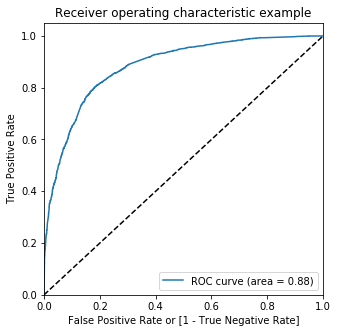

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### - Step 9: Finding the optimal cutoff point

In [143]:
#The optimal cutoff point will be where we get a balance between sensitivity and specificity
#Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0


In [144]:
#Now we'll calculate the accuracy, sensitivity and specificity

cut_off = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off.loc[i] =[ i ,accuracy,sensi,speci]

print(cut_off)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.379667     1.000000     0.000000
0.1   0.1  0.603251     0.972787     0.377082
0.2   0.2  0.732195     0.920900     0.616700
0.3   0.3  0.796666     0.839260     0.770597
0.4   0.4  0.814713     0.777576     0.837442
0.5   0.5  0.804932     0.660740     0.893182
0.6   0.6  0.794049     0.589623     0.919165
0.7   0.7  0.778620     0.507620     0.944481
0.8   0.8  0.755614     0.405660     0.969798
0.9   0.9  0.705469     0.239115     0.990895


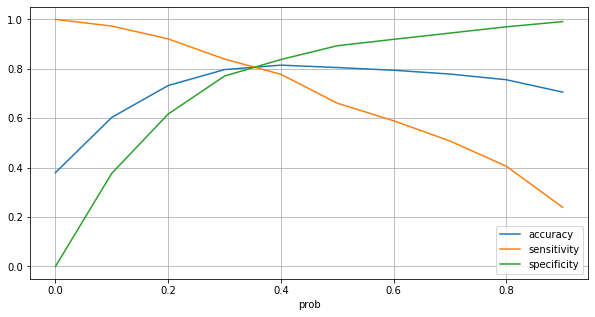

In [145]:
#Visualising the above data

cut_off.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'], figsize = (10,5))

plt.grid(True)
plt.show()

In [146]:
#As can be seen above, 0.34 is the optimum cut off point

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1


#### - Step 10: Assigning the lead score

In [147]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1,39
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1,54
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1,44


In [148]:
#Checking accuracy

train_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

train_accuracy

0.8065849290535887

In [149]:
#Checking sensitivity

train_sensitivity = TP/float(TN+FP)
train_sensitivity

0.4043970686209194

In [150]:
#Checking specificity

train_specificity = TN/float(TN+FP)
train_specificity

0.8931823228958472

#### - Step 11: Precision and Recall

In [151]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

precision

0.7910512597741095

In [152]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

recall

0.6607402031930334

In [153]:
train_F1_score = 2*(precision*recall)/(precision+recall)
train_F1_score

0.7200474495848161

#### - Step 12: Precsion and Recall tradeoff

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

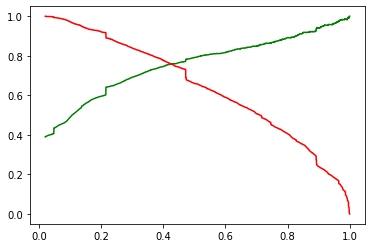

In [155]:
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

In [156]:
#Now we'll make predictions on the test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.300780,-0.255196,0.976193,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.467531,-0.587537,1.534715,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.300780,0.282792,0.976193,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,1.023031,-0.183587,2.093237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.421470,-0.064238,-0.140852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [157]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Other,What is your current occupation_Working Professional
1461,0,-0.760134,0,0,0,0,0,1,0,0,1,0
7926,0,-0.462680,0,0,0,0,0,1,0,0,1,0
1909,0,-0.099125,1,0,0,0,1,0,0,0,0,0
8971,0,2.370480,1,0,0,0,1,0,0,0,0,0
5310,0,-0.705050,1,0,0,0,0,0,0,1,0,0


In [158]:
X_test_sm = sm.add_constant(X_test)

In [159]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred[:10]

1461    0.018878
7926    0.026034
1909    0.188731
8971    0.780935
5310    0.279575
4774    0.215318
2084    0.215318
6351    0.168332
335     0.892434
8202    0.224565
dtype: float64

In [161]:
#Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
1461,0.018878
7926,0.026034
1909,0.188731
8971,0.780935
5310,0.279575


In [162]:
#Converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [163]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

y_pred_final.head()

,Converted,0
1461,0,0.018878
7926,0,0.026034
1909,0,0.188731
8971,1,0.780935
5310,0,0.279575


In [164]:
#Renaming the column

y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_Prob'})

y_pred_final.head()

,Converted,Converted_Prob
1461,0,0.018878
7926,0,0.026034
1909,0,0.188731
8971,1,0.780935
5310,0,0.279575


In [165]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [166]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [167]:
Lead_Score = y_pred_final.copy()
y_pred_final.head()

,Converted,Converted_Prob,Final_Predicted,Lead_Score
1461,0,0.018878,0,2
7926,0,0.026034,0,3
1909,0,0.188731,0,19
8971,1,0.780935,1,78
5310,0,0.279575,0,28


In [168]:
Lead_Score.reset_index(level = 0, inplace = True)
Lead_Score.drop(['Converted','Converted_Prob','Final_Predicted'], 1, inplace = True)

Lead_Score.head()

,index,Lead_Score
0,1461,2
1,7926,3
2,1909,19
3,8971,78
4,5310,28


In [169]:
Leads = Leads_dub.copy()
Leads.reset_index(level = 0, inplace = True)
Leads.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1, inplace = True)

Leads.head()

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [170]:
Lead_Score = pd.merge(Leads, Lead_Score, on = 'index')
Lead_Score.drop(['index'], 1, inplace = True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,9
1,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,5
2,af465dfc-7204-4130-9e05-33231863c4b5,660616,25
3,8bf76a52-2478-476b-8618-1688e07874ad,660562,87
4,88867067-3750-4753-8d33-1c7d1db53b5e,660558,12


##### - As we were told by the client, the model is required to identify potential leads. The higher the score, the more likely they are to convert.

In [171]:
Lead_Score.sort_values(['Lead_Score'], ascending = False, inplace = True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
509,6cb07bc3-6d9d-47a4-81e1-5c50011e380e,634040,100
1140,d23ae8c1-7938-4a8b-b22f-459adf894488,605210,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,100
1210,d34b684a-7d92-4f13-abfb-8a507ce0351c,601868,100
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,100


In [172]:
#Checking Accuracy

Test_Accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

Test_Accuracy

0.8

In [173]:
confusion_mat2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion_mat2

array([[928, 208],
       [155, 524]])

In [174]:
#Checking Sensitivity

test_sensitivity = TP/float(TP+FN)
test_sensitivity

0.6607402031930334

In [175]:
#Checking Specificity

test_specificity = TN/float(TN+FP)
test_specificity

0.8931823228958472

In [176]:
precision = precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
precision

0.7158469945355191

In [177]:
recall = recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
recall

0.7717231222385862

In [178]:
testF1_score = 2*(precision*recall)/(precision+recall)
testF1_score

0.7427356484762581

#### - Final Observation:

##### From the insights that have been gathered, the team was able to build a model and share the lead score. This will now help the sales team target leads better.

In [179]:
Lead_Score

,Prospect ID,Lead Number,Lead_Score
509,6cb07bc3-6d9d-47a4-81e1-5c50011e380e,634040,100
1140,d23ae8c1-7938-4a8b-b22f-459adf894488,605210,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,100
1210,d34b684a-7d92-4f13-abfb-8a507ce0351c,601868,100
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,100
...,...,...,...
869,787d57cb-2c32-4ace-b671-183b16348529,617618,1
879,1fea5ab7-763f-4d08-a995-84b2e234d0aa,616885,1
134,3a5ae711-bb52-41df-8cbc-29eb6572c377,653652,1
124,38f1be2c-ff94-411a-8fe9-b0e4a433e1fa,653990,1


#### - Model Evaluation Metrics

In [180]:
#Comparing Train and Test values

print('Train Data Accuracy: {}%'.format(round(train_accuracy*100),2))
print('Train Data Sensitivity: {}%'.format(round(train_sensitivity*100),2))
print('Train Data Specificity: {}%'.format(round(train_sensitivity*100),2))
print('Train Data F1 Score: {}%'.format(round(train_F1_score*100),2))
print('Test Data Accuracy: {}%'.format(round(Test_Accuracy*100),2))
print('Test Data Sensitivity: {}%'.format(round(test_sensitivity*100),2))
print('Test Data Specificity: {}%'.format(round(test_specificity*100),2))
print('Test Data F1 Score: {}%'.format(round(testF1_score*100),2))

Train Data Accuracy: 81.0%
Train Data Sensitivity: 40.0%
Train Data Specificity: 40.0%
Train Data F1 Score: 72.0%
Test Data Accuracy: 80.0%
Test Data Sensitivity: 66.0%
Test Data Specificity: 89.0%
Test Data F1 Score: 74.0%


In [181]:
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4503
           1       0.72      0.82      0.76      2756

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259



In [182]:
print(classification_report(y_pred_final.Converted, y_pred_final.Final_Predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1136
           1       0.72      0.77      0.74       679

    accuracy                           0.80      1815
   macro avg       0.79      0.79      0.79      1815
weighted avg       0.80      0.80      0.80      1815

